## 2.1 Data Manupulation

### Pytorch Extreme Basic Operations and Usage

In [3]:
import torch
import numpy as np

### Tensors

Creating Numpy Array

In [4]:
## Making Tensors from the numpy 
list_number = [1, 2, 3, 4, 5]
numpy_array = np.array(list_number)
numpy_array, type(numpy_array)

(array([1, 2, 3, 4, 5]), numpy.ndarray)

In [5]:
x = torch.from_numpy(numpy_array)
x, type(x)

(tensor([1, 2, 3, 4, 5]), torch.Tensor)

### Using `arange` to create a numpy array:

In [6]:
x = torch.arange(0, 10, 1)
x

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### `reshape`

In [7]:
y = x.reshape(2, 5)
y, type(y)

(tensor([[0, 1, 2, 3, 4],
         [5, 6, 7, 8, 9]]),
 torch.Tensor)

`reshape` with `-1` to infer dimension:

In [12]:
z = x.reshape(-1, 5)
z, type(z)

(tensor([[0, 1, 2, 3, 4],
         [5, 6, 7, 8, 9]]),
 torch.Tensor)

In [11]:
h = x.reshape(2, -1)
h, type(h)

(tensor([[0, 1, 2, 3, 4],
         [5, 6, 7, 8, 9]]),
 torch.Tensor)

### Initializing a tensor with zeros or ones

In [15]:
x= torch.zeros((2, 3))
x, type(x)

(tensor([[0., 0., 0.],
         [0., 0., 0.]]),
 torch.Tensor)

In [16]:
y=torch.ones((2, 3))
y, type(y)

(tensor([[1., 1., 1.],
         [1., 1., 1.]]),
 torch.Tensor)

### Generating a random tensor

In [29]:
torch.manual_seed(0)  # For reproducibility
x = torch.rand((2, 3))
x, type(x)

(tensor([[0.4963, 0.7682, 0.0885],
         [0.1320, 0.3074, 0.6341]]),
 torch.Tensor)

### Creating tensors with specific values:

In [30]:
torch.tensor([[1, 2, 3], [4, 5, 6]])

tensor([[1, 2, 3],
        [4, 5, 6]])

### Indexing and slicing tensors

In [40]:
x = torch.arange(0, 9, 1)
x, type(x)

(tensor([0, 1, 2, 3, 4, 5, 6, 7, 8]), torch.Tensor)

In [43]:
x = x.reshape(3, -1)

In [44]:
x

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

### Indexing 

In [45]:
x[-1]

tensor([6, 7, 8])

In [46]:
x[:2]

tensor([[0, 1, 2],
        [3, 4, 5]])

### Writing values to specific indices

In [48]:
x[1, 1] = 10

In [49]:
x

tensor([[ 0,  1,  2],
        [ 3, 10,  5],
        [ 6,  7,  8]])

In [50]:
x[1][1] = 20
x

tensor([[ 0,  1,  2],
        [ 3, 20,  5],
        [ 6,  7,  8]])

### Assigning a range of values 

In [79]:
#assigning the first column as all ones
x[:, 0] = 1
x

tensor([[1.0000, 0.8964, 0.4556, 0.6323, 0.3489]])

In [80]:
#assigning the last column first 2 rows as all zeros
x[0:2, -1] = 0
x

tensor([[1.0000, 0.8964, 0.4556, 0.6323, 0.0000]])

### Operations on Tensors:
In general, operations on tensors are applied element-wise. For example, if `x` and `y` are tensors, then:

In [81]:
x = torch.rand(1, 5)
y = torch.rand(1, 5)
x,y

(tensor([[0.6977, 0.8000, 0.1610, 0.2823, 0.6816]]),
 tensor([[0.9152, 0.3971, 0.8742, 0.4194, 0.5529]]))

Operations

In [82]:
x*y, x/y, x+y, x-y

(tensor([[0.6385, 0.3177, 0.1408, 0.1184, 0.3769]]),
 tensor([[0.7623, 2.0146, 0.1842, 0.6730, 1.2328]]),
 tensor([[1.6129, 1.1971, 1.0352, 0.7017, 1.2345]]),
 tensor([[-0.2175,  0.4029, -0.7131, -0.1371,  0.1287]]))

### Performing Linear Algebra Operations

In [83]:
X = torch.arange(0, 10, 1).reshape(2, 5)
Y = torch.arange(10, 20, 1).reshape(2, 5)
X, Y

(tensor([[0, 1, 2, 3, 4],
         [5, 6, 7, 8, 9]]),
 tensor([[10, 11, 12, 13, 14],
         [15, 16, 17, 18, 19]]))

### `cat` operation

In [84]:
Z_dim0 = torch.cat((X, Y), dim=0)
Z_dim1 = torch.cat((X, Y), dim=1)
Z_dim0, Z_dim1

(tensor([[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14],
         [15, 16, 17, 18, 19]]),
 tensor([[ 0,  1,  2,  3,  4, 10, 11, 12, 13, 14],
         [ 5,  6,  7,  8,  9, 15, 16, 17, 18, 19]]))

Using `sum` to sum across all dimensions resulting in a scalar

In [85]:
torch.sum(Z_dim0), torch.sum(Z_dim1)

(tensor(190), tensor(190))

### Broadcasting

When we do broadcasting, we can add a tensor of shape `(3, 1)` to a tensor of shape `(1, 2)`. The first tensor is broadcasted across the second dimension, and the second tensor is broadcasted across the first dimension.

In [61]:
a = torch.tensor([0,1,2]).reshape(3, 1)
b = torch.tensor([4,5]).reshape(1, 2)
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[4, 5]]))

In [62]:
a+b

tensor([[4, 5],
        [5, 6],
        [6, 7]])

### Saving Memory

When we creatre tensors and perform some operations, i.e Y= Y+X, the new memory location is created for Y. We can't do like go around and allocate memory unnecessarily. We can use `Y+=X` to save memory. This is called in-place operation.

In [71]:
before = id(Y)
Y = Y + X
after = id(Y)
before == after

False

In [72]:
before_ = id(X)
X += Y
after_ = id(X)
after_ == before_

True

Conversion of other python objects

In [ ]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

In [77]:
a = torch.arange(0, 9, 1).reshape(3, 3)
b = torch.tensor([4, 5, 6]).reshape(3, 1)
a, b

(tensor([[0, 1, 2],
         [3, 4, 5],
         [6, 7, 8]]),
 tensor([[4],
         [5],
         [6]]))

In [78]:
a+b

tensor([[ 4,  5,  6],
        [ 8,  9, 10],
        [12, 13, 14]])

## 2.2 Data Preprocessing

### Training a Neural Network for the Abalone Dataset

In [76]:
import pandas as pd
import torch
import numpy as np

In [50]:
body = pd.read_csv("abalone/abalone.data", header=None)
body.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

In [51]:
body.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [52]:
headers = ["Sex", "Length", "Diameter", "Height", "WholeWeight", "ShuckedWeight", "VisceraWeight", "ShellWeight", "Rings"]
body.columns = headers
body.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [53]:
body.describe()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Checking for the null values in the dataset:


In [54]:
body.isnull().sum()

Sex              0
Length           0
Diameter         0
Height           0
WholeWeight      0
ShuckedWeight    0
VisceraWeight    0
ShellWeight      0
Rings            0
dtype: int64

Inspecting the dataset columns and their data types:

In [55]:
body.columns, body.dtypes

(Index(['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight',
        'VisceraWeight', 'ShellWeight', 'Rings'],
       dtype='object'),
 Sex               object
 Length           float64
 Diameter         float64
 Height           float64
 WholeWeight      float64
 ShuckedWeight    float64
 VisceraWeight    float64
 ShellWeight      float64
 Rings              int64
 dtype: object)

In [56]:
body["Sex"].value_counts()

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64

Doing one hot encoding for neural networks as the neural networks do not understand categorical data like if i assign M as 0, F as 1 and I as 2, the neural network will think that M is less than F and F is less than I which is not true.

In [59]:
body = pd.get_dummies(body, columns=["Sex"])

Checking the correlation between the features and the target variable
Correlation heatmap describes the relationship between the features and the target variable. A high correlation (close to 1 or -1) indicates a strong relationship, while a value close to 0 indicates a weak relationship.

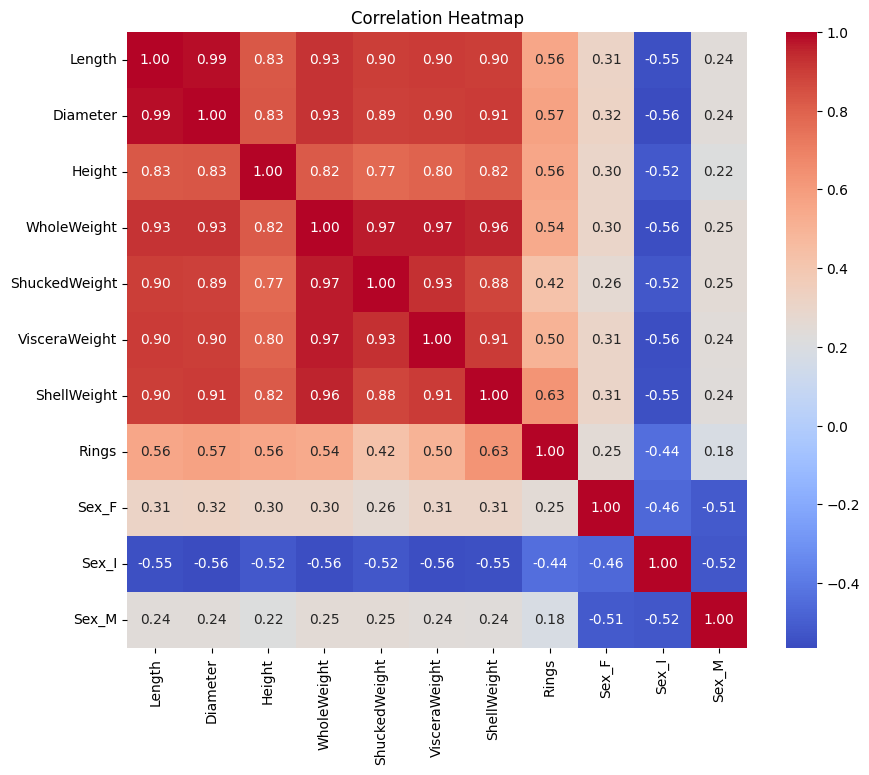

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(body.corr(), annot=True, fmt=".2f", cmap="coolwarm")
# Checking the correlation between the features and the target variable
plt.title("Correlation Heatmap")
plt.show()

In [61]:
body.head()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,False,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,False,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,True,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,False,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,False,True,False


Applying StandardScaler to the dataset

In [72]:
X = body.drop(columns=["Rings"])
y = body["Rings"]
X.head(), y.head()

(   Length  Diameter  Height  WholeWeight  ShuckedWeight  VisceraWeight  \
 0   0.455     0.365   0.095       0.5140         0.2245         0.1010   
 1   0.350     0.265   0.090       0.2255         0.0995         0.0485   
 2   0.530     0.420   0.135       0.6770         0.2565         0.1415   
 3   0.440     0.365   0.125       0.5160         0.2155         0.1140   
 4   0.330     0.255   0.080       0.2050         0.0895         0.0395   
 
    ShellWeight  Sex_F  Sex_I  Sex_M  
 0        0.150  False  False   True  
 1        0.070  False  False   True  
 2        0.210   True  False  False  
 3        0.155  False  False   True  
 4        0.055  False   True  False  ,
 0    15
 1     7
 2     9
 3    10
 4     7
 Name: Rings, dtype: int64)

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3341, 10), (836, 10), (3341,), (836,))

In [74]:
X_test

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Sex_F,Sex_I,Sex_M
866,0.605,0.455,0.160,1.1035,0.4210,0.3015,0.325,False,False,True
1483,0.590,0.440,0.150,0.8725,0.3870,0.2150,0.245,False,False,True
599,0.560,0.445,0.195,0.9810,0.3050,0.2245,0.335,True,False,False
1702,0.635,0.490,0.170,1.2615,0.5385,0.2665,0.380,True,False,False
670,0.475,0.385,0.145,0.6175,0.2350,0.1080,0.215,False,False,True
...,...,...,...,...,...,...,...,...,...,...
3093,0.520,0.430,0.150,0.7280,0.3020,0.1575,0.235,True,False,False
1651,0.595,0.435,0.150,0.9000,0.4175,0.1700,0.265,True,False,False
2897,0.545,0.430,0.150,0.7420,0.3525,0.1580,0.208,False,True,False
3953,0.465,0.355,0.120,0.5805,0.2550,0.0915,0.184,False,True,False


In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numerical_cols = ['Length', 'Diameter', 'Height', 'WholeWeight', 
                  'ShuckedWeight', 'VisceraWeight', 'ShellWeight']

categorical_cols = ['Sex_F', 'Sex_I', 'Sex_M']

# Scaling only the numerical columns
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])
## We should never use the fit_transform on the test set, only transform it.
x_train_categorical = X_train[categorical_cols].astype(int).values
x_test_categorical = X_test[categorical_cols].astype(int).values
# Combining scaled numerical and categorical data
X_train_scaled = np.hstack((X_train_scaled, x_train_categorical))
X_test_scaled = np.hstack((X_test_scaled, x_test_categorical))


In [104]:
X_test_scaled

array([[ 0.67189513,  0.47107108,  0.47543449, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.54597132,  0.31905249,  0.24018173, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.29412372,  0.36972535,  1.29881914, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.16819992,  0.21770676,  0.24018173, ...,  0.        ,
         1.        ,  0.        ],
       [-0.50339368, -0.5423862 , -0.46557654, ...,  0.        ,
         1.        ,  0.        ],
       [-1.34288568, -1.35315201, -1.2889612 , ...,  0.        ,
         1.        ,  0.        ]])

In [79]:
#converting into the pytorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)
X_train_tensor.shape, X_test_tensor.shape, y_train_tensor.shape, y_test_tensor.shape

(torch.Size([3341, 10]),
 torch.Size([836, 10]),
 torch.Size([3341, 1]),
 torch.Size([836, 1]))

In [83]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader


In [84]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)


In [85]:
class AbaloneNN(nn.Module):
    def __init__(self):
        super(AbaloneNN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(10, 64),   # Input layer -> hidden layer 1
            nn.ReLU(),
            nn.Linear(64, 32),   # hidden layer 1 -> hidden layer 2
            nn.ReLU(),
            nn.Linear(32, 1)     # output layer (single regression value)
        )
    
    def forward(self, x):
        return self.net(x)


In [90]:
try:
    from torchviz import make_dot
    from torch.autograd import Variable

    # Create sample input
    x = Variable(torch.randn(1, 10))
    model = AbaloneNN()

    # Generate output
    y = model(x)

    # Create and save the visualization
    dot = make_dot(y, params=dict(list(model.named_parameters())))
    
    # Try to render, but handle the case where Graphviz is not installed
    try:
        dot.render("abalone_model", format="png")
        print("Model visualization saved as 'abalone_model.png'")
    except:
        print("Could not save visualization. Please install Graphviz first:")
        print("Ubuntu/Debian: sudo apt-get install graphviz")
        print("MacOS: brew install graphviz")
        print("Windows: Download installer from https://graphviz.org/download/")
except ImportError:
    print("torchviz not installed. Install with: pip install torchviz")

Model visualization saved as 'abalone_model.png'


In [99]:
model = AbaloneNN()

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)


Training Loop

In [100]:
epochs = 100
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * inputs.size(0)
    
    epoch_train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_train_loss)
    
    # Validation phase using test_loader
    model.eval()
    val_running_loss = 0.0
    with torch.no_grad():
        for val_inputs, val_targets in test_loader:
            val_outputs = model(val_inputs)
            val_loss = criterion(val_outputs, val_targets)
            val_running_loss += val_loss.item() * val_inputs.size(0)
    epoch_val_loss = val_running_loss / len(test_loader.dataset)
    val_losses.append(epoch_val_loss)
    
    print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {epoch_train_loss:.4f}, Validation Loss: {epoch_val_loss:.4f}")


Epoch [1/100], Train Loss: 108.4391, Validation Loss: 106.4517
Epoch [2/100], Train Loss: 105.4254, Validation Loss: 103.2934
Epoch [3/100], Train Loss: 101.8125, Validation Loss: 99.1566
Epoch [4/100], Train Loss: 96.9219, Validation Loss: 93.7116
Epoch [5/100], Train Loss: 90.8297, Validation Loss: 87.1242
Epoch [6/100], Train Loss: 83.3423, Validation Loss: 79.0560
Epoch [7/100], Train Loss: 74.6139, Validation Loss: 70.1486
Epoch [8/100], Train Loss: 65.3523, Validation Loss: 60.9970
Epoch [9/100], Train Loss: 56.1510, Validation Loss: 52.2556
Epoch [10/100], Train Loss: 47.6747, Validation Loss: 44.5294
Epoch [11/100], Train Loss: 40.5735, Validation Loss: 38.3516
Epoch [12/100], Train Loss: 35.1261, Validation Loss: 33.6796
Epoch [13/100], Train Loss: 31.2029, Validation Loss: 30.2961
Epoch [14/100], Train Loss: 28.4429, Validation Loss: 27.8358
Epoch [15/100], Train Loss: 26.4114, Validation Loss: 25.8796
Epoch [16/100], Train Loss: 24.7848, Validation Loss: 24.2395
Epoch [17/10

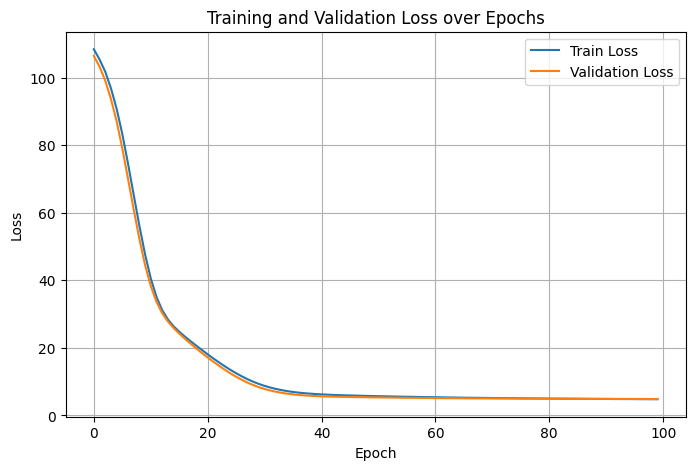

In [101]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()


In [102]:
model.eval()
actuals = []
predictions = []

with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        actuals.append(targets)
        predictions.append(outputs)

# Concatenate all batches
actuals = torch.cat(actuals).squeeze().numpy()
predictions = torch.cat(predictions).squeeze().numpy()

# Display side by side (first 10 samples)
for i in range(10):
    print(f"Actual: {actuals[i]:.2f} \t Predicted: {predictions[i]:.2f}")


Actual: 9.00 	 Predicted: 11.59
Actual: 8.00 	 Predicted: 10.41
Actual: 16.00 	 Predicted: 14.08
Actual: 9.00 	 Predicted: 11.58
Actual: 14.00 	 Predicted: 11.61
Actual: 11.00 	 Predicted: 10.74
Actual: 7.00 	 Predicted: 9.95
Actual: 6.00 	 Predicted: 8.84
Actual: 7.00 	 Predicted: 6.91
Actual: 10.00 	 Predicted: 10.63


In [105]:
#RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(actuals, predictions))
print(f"RMSE: {rmse:.2f}")

RMSE: 2.20
